In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import astropy
from astropy import units as u
plt.rcParams['text.usetex'] = True

In [2]:
# Constants
c = 3e8  # [c]=m/s
aB = 0.0529*1e-9  # [a0]=m  (Bohr radius)
k = 8.987e9  # Coulomb const in SI
Z = 1  # positive ion charge
e = 1.602e-19
me = 9.109e-31  # kg

In [3]:
# Initialization
v0x = 1e6  # initial x-velocity [m/s]
b = 10*aB  # impact parameter [m] (in terms of Bohr radius)
x0 = -100*aB  # initial x-position [m] (in terms of Bohr radius)
dt = 1e-19  # timestep [s]
N = 100000  # number of iteration

# Initialize arrays
t = np.zeros(N)
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
ax = np.zeros(N)
ay = np.zeros(N)

# Initial conditions
t[0] = 0
x[0] = x0
y[0] = b
vx[0] = v0x
vy[0] = 0

In [4]:
# Simulation loop
for i in range(1, N):
    r = np.sqrt((x[i-1])**2+(y[i-1])**2)  # separation by Pyth theorem
    F = k*e**2*Z*1/r**2  # Coulomb force magnitude
    Fx = -F*(x[i-1]/r)  # x-component of the force (attractive)
    Fy = -F*(y[i-1]/r)  # y-component of the force (attractive)
    ax[i-1] = Fx/me
    ay[i-1] = Fy/me
    # Update velocity
    vx[i] = vx[i-1]+ax[i-1]*dt
    vy[i] = vy[i-1]+ay[i-1]*dt
    # Update position
    x[i] = x[i-1]+vx[i]*dt
    y[i] = y[i-1]+vy[i]*dt
    # Update time
    t[i] = t[i-1] + dt

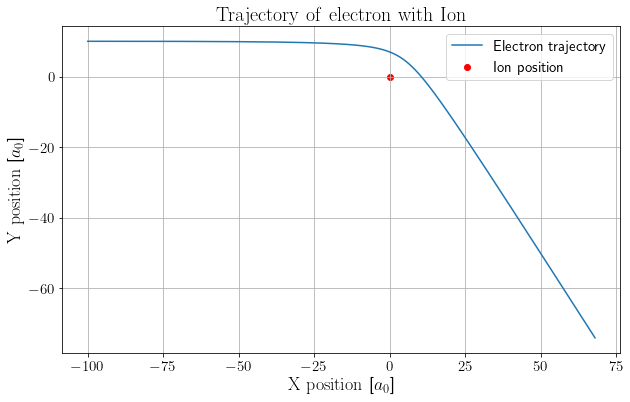

In [19]:
# Plot xy-plane trajectory
plt.figure(figsize=(10, 6))
plt.plot(x/aB, y/aB, label='Electron trajectory')
plt.scatter([0], [0], color='red', label='Ion position')  # assuming massive ion no recoil
plt.xlabel(r'$\rm X\,\,position$ [$a_0$]', size=18)
plt.ylabel(r'$\rm Y\,\,position$ [$a_0$]', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$\rm{Trajectory\,\,of\,\,electron\,\,with\,\,Ion}$', size=20)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

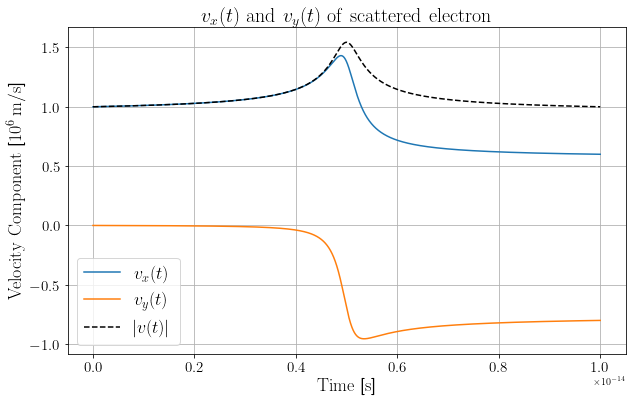

In [16]:
# Plot velocity components
plt.figure(figsize=(10, 6))
plt.plot(np.arange(N)*dt, vx/1e6, label=r'$v_x(t)$')
plt.plot(np.arange(N)*dt, vy/1e6, label=r'$v_y(t)$')
plt.plot(np.arange(N)*dt, np.sqrt(vx**2+vy**2)/1e6, 'k--', label=r'$|v(t)|$')  # just to check
plt.ylabel(r'$\rm Velocity\,\,Component$ [$10^6\,{\rm m/s}$]', size=18)
plt.xlabel(r'$\rm Time$ [${\rm s}$]', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$v_x(t)\,\,{\rm and}\,\,v_y(t)\,\,{\rm of\,\,scattered\,\,electron}$', size=20)
plt.legend(fontsize=18)
plt.grid(True)
plt.show()

In [7]:
np.sqrt((vx[0]**2+vy[0]**2)/(vx[-1]**2+vy[-1]**2))  # initial and final kinetic energy ratio

1.000037192332081

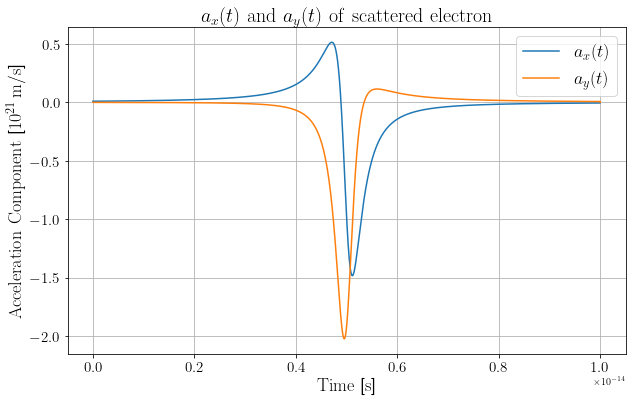

In [8]:
# Plot acceleration components
plt.figure(figsize=(10, 6))
plt.plot(np.arange(N)*dt, ax/1e21, label=r'$a_x(t)$')
plt.plot(np.arange(N)*dt, ay/1e21, label=r'$a_y(t)$')
plt.ylabel(r'$\rm Acceleration\,\,Component$ [$10^{21}\,{\rm m/s}$]', size=18)
plt.xlabel(r'$\rm Time$ [${\rm s}$]', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$a_x(t)\,\,{\rm and}\,\,a_y(t)\,\,{\rm of\,\,scattered\,\,electron}$', size=20)
plt.legend(fontsize=18)
plt.grid(True)
plt.show()

#### Q2 guess
The larger the acceleartion magnitude, the larger the corresponding power, the acceleration is at max when the electron is at its closest approach

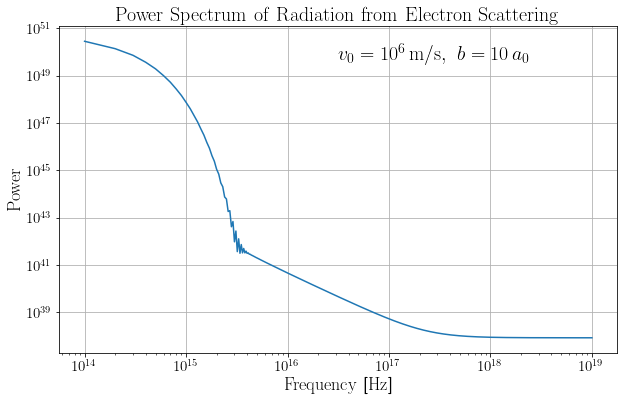

In [51]:
# Power spectrum of the radiation (initial setup)
a = np.sqrt(ax**2 + ay**2)  # magnitude of total acceleration
fft_a = np.fft.fft(a)  # FT on acceleration magnitude
freq = np.fft.fftfreq(n=N, d=dt)  # FT frequency
PS = np.abs(fft_a)**2  # power spectrum

pos_ind = freq > 0  # only positive frequency allowed
pos_freq = freq[pos_ind]
pos_PS = PS[pos_ind]

# Plotting the power spectrum
plt.figure(figsize=(10, 6))
plt.loglog(pos_freq, pos_PS)
plt.ylabel(r'$\rm Power$', size=18)
plt.xlabel(r'$\rm Frequency$ [${\rm Hz}$]', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$\rm Power\,\,Spectrum\,\,of\,\,Radiation\,\,from\,\,Electron\,\,Scattering$', size=20)
plt.grid(True)
#plt.xlim(5e15,1e16)
textbox_text = r'$v_0=10^6\,{\rm m/s}, \,\,b=10\,a_0$'
plt.text(0.5, 0.95, textbox_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top', bbox=dict(alpha=0))

plt.show()

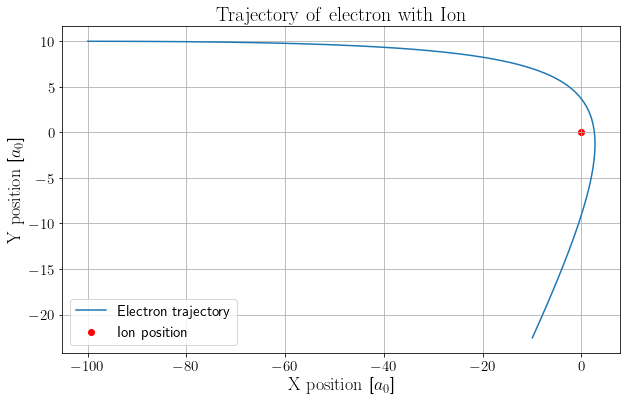

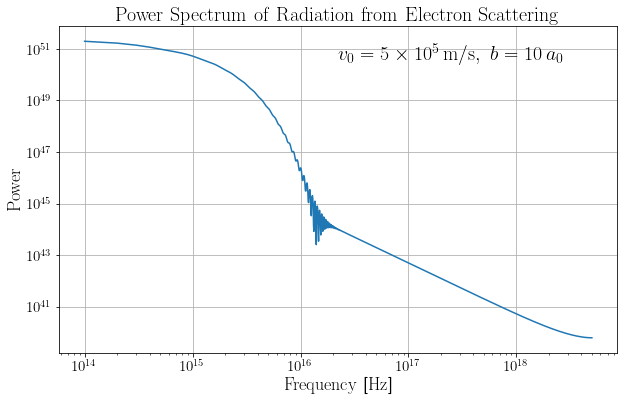

In [52]:
# Power spectrum of the radiation (different setup: slower v0x)
# Initialization
v0x = 5e5  # initial x-velocity [m/s]
b = 10*aB  # impact parameter [m] (in terms of Bohr radius)
x0 = -100*aB  # initial x-position [m] (in terms of Bohr radius)
dt = 1e-19  # timestep [s]
N = 100000  # number of iteration
# Initialize arrays
t = np.zeros(N)
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
ax = np.zeros(N)
ay = np.zeros(N)
# Initial conditions
t[0] = 0
x[0] = x0
y[0] = b
vx[0] = v0x
vy[0] = 0
# Simulation loop
for i in range(1, N):
    r = np.sqrt((x[i-1])**2+(y[i-1])**2)  # separation by Pyth theorem
    F = k*e**2*Z*1/r**2  # Coulomb force magnitude
    Fx = -F*(x[i-1]/r)  # x-component of the force (attractive)
    Fy = -F*(y[i-1]/r)  # y-component of the force (attractive)
    ax[i-1] = Fx/me
    ay[i-1] = Fy/me
    # Update velocity
    vx[i] = vx[i-1]+ax[i-1]*dt
    vy[i] = vy[i-1]+ay[i-1]*dt
    # Update position
    x[i] = x[i-1]+vx[i]*dt
    y[i] = y[i-1]+vy[i]*dt
    # Update time
    t[i] = t[i-1] + dt
    
# Plot xy-plane trajectory
plt.figure(figsize=(10, 6))
plt.plot(x/aB, y/aB, label='Electron trajectory')
plt.scatter([0], [0], color='red', label='Ion position')  # assuming massive ion no recoil
plt.xlabel(r'$\rm X\,\,position$ [$a_0$]', size=18)
plt.ylabel(r'$\rm Y\,\,position$ [$a_0$]', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$\rm{Trajectory\,\,of\,\,electron\,\,with\,\,Ion}$', size=20)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()
# Power spectrum of the radiation (initial setup)
a = np.sqrt(ax**2 + ay**2)  # magnitude of total acceleration
fft_a = np.fft.fft(a)  # FT on acceleration magnitude
freq = np.fft.fftfreq(n=N, d=dt)  # FT frequency
PS = np.abs(fft_a)**2  # power spectrum
pos_ind = freq > 0  # only positive frequency allowed
pos_freq = freq[pos_ind]
pos_PS = PS[pos_ind]
# Plotting the power spectrum
plt.figure(figsize=(10, 6))
plt.loglog(pos_freq, pos_PS)
plt.ylabel(r'$\rm Power$', size=18)
plt.xlabel(r'$\rm Frequency$ [${\rm Hz}$]', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$\rm Power\,\,Spectrum\,\,of\,\,Radiation\,\,from\,\,Electron\,\,Scattering$', size=20)
plt.grid(True)
textbox_text = r'$v_0=5\times10^5\,{\rm m/s}, \,\,b=10\,a_0$'
plt.text(0.5, 0.95, textbox_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top', bbox=dict(alpha=0))

plt.show()

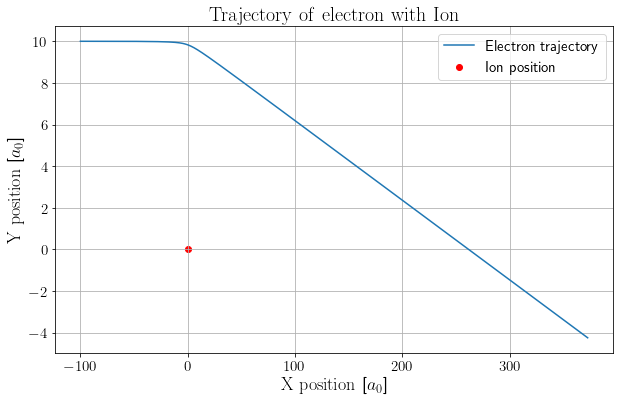

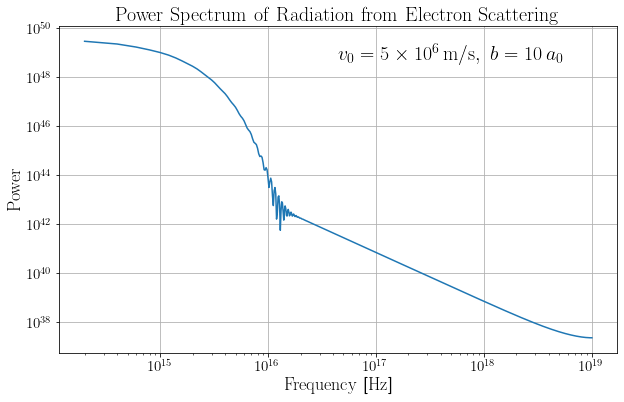

In [53]:
# Power spectrum of the radiation (different setup: faster v0x)
# Initialization
v0x = 5e6  # initial x-velocity [m/s]
b = 10*aB  # impact parameter [m] (in terms of Bohr radius)
x0 = -100*aB  # initial x-position [m] (in terms of Bohr radius)
dt = 5e-20  # timestep [s]
N = 100000  # number of iteration
# Initialize arrays
t = np.zeros(N)
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
ax = np.zeros(N)
ay = np.zeros(N)
# Initial conditions
t[0] = 0
x[0] = x0
y[0] = b
vx[0] = v0x
vy[0] = 0
# Simulation loop
for i in range(1, N):
    r = np.sqrt((x[i-1])**2+(y[i-1])**2)  # separation by Pyth theorem
    F = k*e**2*Z*1/r**2  # Coulomb force magnitude
    Fx = -F*(x[i-1]/r)  # x-component of the force (attractive)
    Fy = -F*(y[i-1]/r)  # y-component of the force (attractive)
    ax[i-1] = Fx/me
    ay[i-1] = Fy/me
    # Update velocity
    vx[i] = vx[i-1]+ax[i-1]*dt
    vy[i] = vy[i-1]+ay[i-1]*dt
    # Update position
    x[i] = x[i-1]+vx[i]*dt
    y[i] = y[i-1]+vy[i]*dt
    # Update time
    t[i] = t[i-1] + dt
    
# Plot xy-plane trajectory
plt.figure(figsize=(10, 6))
plt.plot(x/aB, y/aB, label='Electron trajectory')
plt.scatter([0], [0], color='red', label='Ion position')  # assuming massive ion no recoil
plt.xlabel(r'$\rm X\,\,position$ [$a_0$]', size=18)
plt.ylabel(r'$\rm Y\,\,position$ [$a_0$]', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$\rm{Trajectory\,\,of\,\,electron\,\,with\,\,Ion}$', size=20)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()
# Power spectrum of the radiation (initial setup)
a = np.sqrt(ax**2 + ay**2)  # magnitude of total acceleration
fft_a = np.fft.fft(a)  # FT on acceleration magnitude
freq = np.fft.fftfreq(n=N, d=dt)  # FT frequency
PS = np.abs(fft_a)**2  # power spectrum
pos_ind = freq > 0  # only positive frequency allowed
pos_freq = freq[pos_ind]
pos_PS = PS[pos_ind]
# Plotting the power spectrum
plt.figure(figsize=(10, 6))
plt.loglog(pos_freq, pos_PS)
plt.ylabel(r'$\rm Power$', size=18)
plt.xlabel(r'$\rm Frequency$ [${\rm Hz}$]', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$\rm Power\,\,Spectrum\,\,of\,\,Radiation\,\,from\,\,Electron\,\,Scattering$', size=20)
plt.grid(True)
textbox_text = r'$v_0=5\times10^6\,{\rm m/s}, \,\,b=10\,a_0$'
plt.text(0.5, 0.95, textbox_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top', bbox=dict(alpha=0))

plt.show()

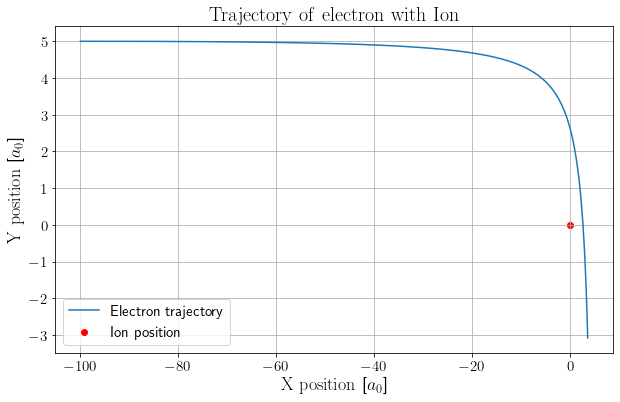

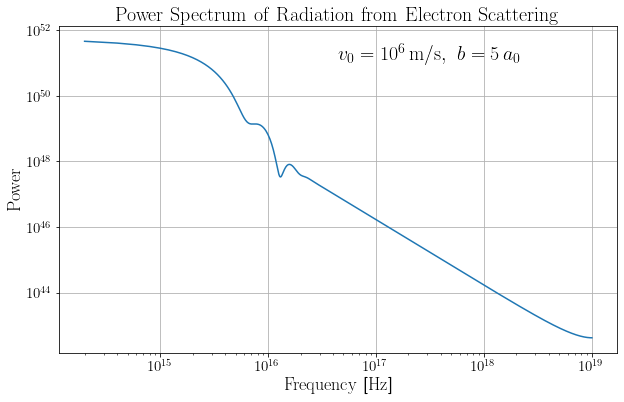

In [54]:
# Power spectrum of the radiation (different setup: closer b)
# Initialization
v0x = 1e6  # initial x-velocity [m/s]
b = 5*aB  # impact parameter [m] (in terms of Bohr radius)
x0 = -100*aB  # initial x-position [m] (in terms of Bohr radius)
dt = 5e-20  # timestep [s]
N = 100000  # number of iteration
# Initialize arrays
t = np.zeros(N)
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
ax = np.zeros(N)
ay = np.zeros(N)
# Initial conditions
t[0] = 0
x[0] = x0
y[0] = b
vx[0] = v0x
vy[0] = 0
# Simulation loop
for i in range(1, N):
    r = np.sqrt((x[i-1])**2+(y[i-1])**2)  # separation by Pyth theorem
    F = k*e**2*Z*1/r**2  # Coulomb force magnitude
    Fx = -F*(x[i-1]/r)  # x-component of the force (attractive)
    Fy = -F*(y[i-1]/r)  # y-component of the force (attractive)
    ax[i-1] = Fx/me
    ay[i-1] = Fy/me
    # Update velocity
    vx[i] = vx[i-1]+ax[i-1]*dt
    vy[i] = vy[i-1]+ay[i-1]*dt
    # Update position
    x[i] = x[i-1]+vx[i]*dt
    y[i] = y[i-1]+vy[i]*dt
    # Update time
    t[i] = t[i-1] + dt
    
# Plot xy-plane trajectory
plt.figure(figsize=(10, 6))
plt.plot(x/aB, y/aB, label='Electron trajectory')
plt.scatter([0], [0], color='red', label='Ion position')  # assuming massive ion no recoil
plt.xlabel(r'$\rm X\,\,position$ [$a_0$]', size=18)
plt.ylabel(r'$\rm Y\,\,position$ [$a_0$]', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$\rm{Trajectory\,\,of\,\,electron\,\,with\,\,Ion}$', size=20)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()
# Power spectrum of the radiation (initial setup)
a = np.sqrt(ax**2 + ay**2)  # magnitude of total acceleration
fft_a = np.fft.fft(a)  # FT on acceleration magnitude
freq = np.fft.fftfreq(n=N, d=dt)  # FT frequency
PS = np.abs(fft_a)**2  # power spectrum
pos_ind = freq > 0  # only positive frequency allowed
pos_freq = freq[pos_ind]
pos_PS = PS[pos_ind]
# Plotting the power spectrum
plt.figure(figsize=(10, 6))
plt.loglog(pos_freq, pos_PS)
plt.ylabel(r'$\rm Power$', size=18)
plt.xlabel(r'$\rm Frequency$ [${\rm Hz}$]', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$\rm Power\,\,Spectrum\,\,of\,\,Radiation\,\,from\,\,Electron\,\,Scattering$', size=20)
plt.grid(True)
textbox_text = r'$v_0=10^6\,{\rm m/s}, \,\,b=5\,a_0$'
plt.text(0.5, 0.95, textbox_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top', bbox=dict(alpha=0))

plt.show()

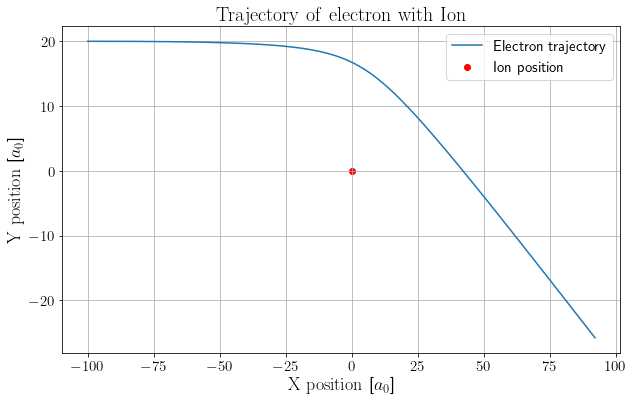

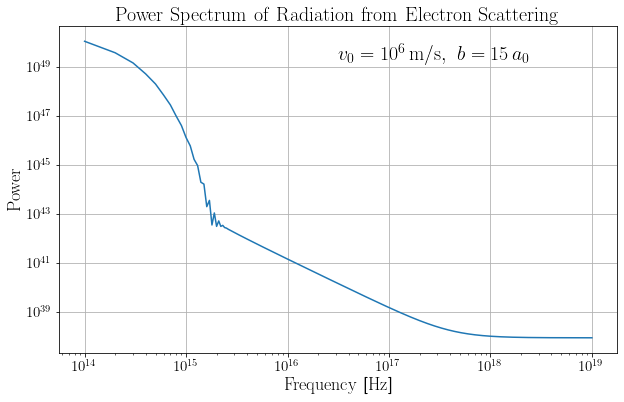

In [56]:
# Power spectrum of the radiation (different setup: farther b)
# Initialization
v0x = 1e6  # initial x-velocity [m/s]
b = 20*aB  # impact parameter [m] (in terms of Bohr radius)
x0 = -100*aB  # initial x-position [m] (in terms of Bohr radius)
dt = 5e-20  # timestep [s]
N = 200000  # number of iteration
# Initialize arrays
t = np.zeros(N)
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
ax = np.zeros(N)
ay = np.zeros(N)
# Initial conditions
t[0] = 0
x[0] = x0
y[0] = b
vx[0] = v0x
vy[0] = 0
# Simulation loop
for i in range(1, N):
    r = np.sqrt((x[i-1])**2+(y[i-1])**2)  # separation by Pyth theorem
    F = k*e**2*Z*1/r**2  # Coulomb force magnitude
    Fx = -F*(x[i-1]/r)  # x-component of the force (attractive)
    Fy = -F*(y[i-1]/r)  # y-component of the force (attractive)
    ax[i-1] = Fx/me
    ay[i-1] = Fy/me
    # Update velocity
    vx[i] = vx[i-1]+ax[i-1]*dt
    vy[i] = vy[i-1]+ay[i-1]*dt
    # Update position
    x[i] = x[i-1]+vx[i]*dt
    y[i] = y[i-1]+vy[i]*dt
    # Update time
    t[i] = t[i-1] + dt
    
# Plot xy-plane trajectory
plt.figure(figsize=(10, 6))
plt.plot(x/aB, y/aB, label='Electron trajectory')
plt.scatter([0], [0], color='red', label='Ion position')  # assuming massive ion no recoil
plt.xlabel(r'$\rm X\,\,position$ [$a_0$]', size=18)
plt.ylabel(r'$\rm Y\,\,position$ [$a_0$]', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$\rm{Trajectory\,\,of\,\,electron\,\,with\,\,Ion}$', size=20)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()
# Power spectrum of the radiation (initial setup)
a = np.sqrt(ax**2 + ay**2)  # magnitude of total acceleration
fft_a = np.fft.fft(a)  # FT on acceleration magnitude
freq = np.fft.fftfreq(n=N, d=dt)  # FT frequency
PS = np.abs(fft_a)**2  # power spectrum
pos_ind = freq > 0  # only positive frequency allowed
pos_freq = freq[pos_ind]
pos_PS = PS[pos_ind]
# Plotting the power spectrum
plt.figure(figsize=(10, 6))
plt.loglog(pos_freq, pos_PS)
plt.ylabel(r'$\rm Power$', size=18)
plt.xlabel(r'$\rm Frequency$ [${\rm Hz}$]', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$\rm Power\,\,Spectrum\,\,of\,\,Radiation\,\,from\,\,Electron\,\,Scattering$', size=20)
plt.grid(True)
textbox_text = r'$v_0=10^6\,{\rm m/s}, \,\,b=15\,a_0$'
plt.text(0.5, 0.95, textbox_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top', bbox=dict(alpha=0))

plt.show()

#### Q2 Discussion
Slower initial $v_0$: the power transition phase is at higher frequency and higher power \
Faster initial $v_0$: the power transition phase is at lower frequency and higher power \
Closer impact parameter $b$: the power transition phase is at significantly higher power \
Farther impact parameter $b$: the power transition phase is at lower frequency